In [182]:
import keras
from keras.layers import Activation, Dense, Dropout, Conv2D, \
                         Flatten, MaxPooling2D
from keras.models import Sequential
import librosa
import librosa.display
import numpy as np
import pandas as pd
import random
import os

import warnings

import pickle

warnings.filterwarnings('ignore')

In [115]:
# creat the dataframe 

names = []
classes = []
classID = []

for ID, filename in enumerate(os.listdir('Datasets')):
    if not filename.startswith('.'):
        for soundname in os.listdir('Datasets'+'/' + filename):
            if soundname.endswith(".wav") or soundname.endswith(".mps") or soundname.endswith(".m4a"): 
                names.append(soundname)
                classes.append(filename)
                classID.append(ID-1)
            else:
                continue
        
#names.append()

data = {'file_name':  names,
        'classes': classes,
        'classID': classID
        }

df = pd.DataFrame(data, columns = ['file_name', 'classes', 'classID'])

In [116]:
df.head()

,file_name,classes,classID
0,1–3 Gloucester Road 121.m4a,Cheers,0
1,1–3 Gloucester Road 122.m4a,Cheers,0
2,1–3 Gloucester Road 123.m4a,Cheers,0
3,1–3 Gloucester Road 124.m4a,Cheers,0
4,1–3 Gloucester Road 125.m4a,Cheers,0


In [4]:
# Example of a Siren spectrogram
y, sr = librosa.load('Datasets/Drinking/20213__modcam__drinking-water.wav', duration=2.97)
ps = librosa.feature.melspectrogram(y=y, sr=sr)
ps.shape

(128, 128)

In [5]:
librosa.display.specshow(ps, y_axis='mel', x_axis='time')

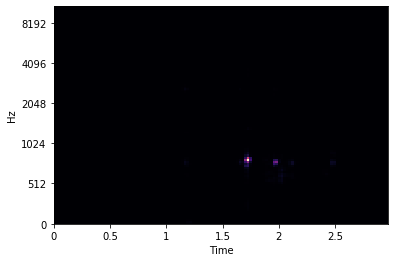

In [7]:
librosa.display.specshow(ps, y_axis='mel', x_axis='time')

In [10]:
# Example of a children playing spectrogram
y, sr = librosa.load('Datasets/Pouring/79188__nathan-lomeli__gurgling-drinking-fountain.wav', duration=2.97)
ps = librosa.feature.melspectrogram(y=y, sr=sr)
ps.shape

(128, 128)

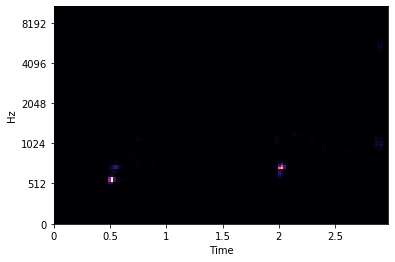

In [11]:
librosa.display.specshow(ps, y_axis='mel', x_axis='time')

In [12]:
# Example of a drilling spectrogram
y, sr = librosa.load('Datasets/Shaking/1–3 Gloucester Road 69.m4a', duration=2.97)
ps = librosa.feature.melspectrogram(y=y, sr=sr)
ps.shape

(128, 128)

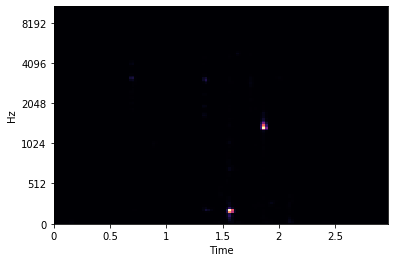

In [13]:
librosa.display.specshow(ps, y_axis='mel', x_axis='time')

Iterate over all samples in _valid_.
For every sample, construct the (128,128) spectrogram

In [118]:
df['path'] = 'Datasets/' + df['classes'] + '/' + df['file_name']

In [119]:
D = [] # Dataset

for count, row in enumerate(df.itertuples()):
    y, sr = librosa.load(row.path, duration=2.97)  
    ps = librosa.feature.melspectrogram(y=y, sr=sr)
    if ps.shape != (128, 128):
        continue
    D.append( (ps, row.classID) )
    if count%100==0:
        print(count, '/', len(df))

0 / 637
100 / 637
200 / 637
300 / 637
400 / 637
500 / 637
600 / 637


In [17]:
print("Number of samples: ", len(D))

Number of samples:  586


In [18]:
dataset = D
random.shuffle(dataset)

train = dataset[:500]
test = dataset[500:]

X_train, y_train = zip(*train)
X_test, y_test = zip(*test)

# Reshape for CNN input
X_train = np.array([x.reshape( (128, 128, 1) ) for x in X_train])
X_test = np.array([x.reshape( (128, 128, 1) ) for x in X_test])

# One-Hot encoding for classes
y_train = np.array(keras.utils.to_categorical(y_train, 5))
y_test = np.array(keras.utils.to_categorical(y_test, 5))

In [19]:
model = Sequential()
input_shape=(128, 128, 1)

model.add(Conv2D(24, (5, 5), strides=(1, 1), input_shape=input_shape))
model.add(MaxPooling2D((4, 2), strides=(4, 2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="valid"))
model.add(MaxPooling2D((4, 2), strides=(4, 2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="valid"))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dropout(rate=0.5))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(5))
model.add(Activation('softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [20]:
model.compile(
	optimizer="Adam",
	loss="categorical_crossentropy",
	metrics=['accuracy'])

model.fit(
	x=X_train, 
	y=y_train,
    epochs=12,
    batch_size=128,
    validation_data= (X_test, y_test))

score = model.evaluate(
	x=X_test,
	y=y_test)

print('Test loss:', score[0])
print('Test accuracy:', score[1])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 500 samples, validate on 86 samples
Epoch 1/12





500/500 [==============================] - 4s 9ms/step - loss: 2.0307 - acc: 0.2420 - val_loss: 1.5242 - val_acc: 0.4535
Epoch 2/12
500/500 [==============================] - 4s 7ms/step - loss: 1.5221 - acc: 0.3500 - val_loss: 1.4636 - val_acc: 0.4535
Epoch 3/12
500/500 [==============================] - 3s 6ms/step - loss: 1.4105 - acc: 0.4120 - val_loss: 1.4120 - val_acc: 0.4651
Epoch 4/12
500/500 [==============================] - 3s 6ms/step - loss: 1.3761 - acc: 0.4180 - val_loss: 1.4300 - val_acc: 0.4767
Epoch 5/12
500/500 [==============================] - 3s 6ms/step - loss: 1.3331 - acc: 0.4400 - val_loss: 1.4535 - val_acc: 0.4651
Epoch 6/12
500/500 [==============================] - 3s 6ms/step - loss: 1.2536 - acc: 0.4580 - val_loss: 1.4992 - val_acc: 0.4767
Epoch 7/12
500/500 [==============================] - 3s 6m

## Data Augmentation

### 1. Vary Time

In [85]:
y, sr = librosa.load('Datasets/Cheers/1–3 Gloucester Road 127.m4a', duration=2.97)
y_changed = librosa.effects.time_stretch(y, rate=0.81)

dirName = 'augmented/Cheers/speed_81'
# Create target directory & all intermediate directories if don't exists
try:
    os.makedirs(dirName)    
    print("Directory " , dirName ,  " Created ")
except FileExistsError:
    print("Directory " , dirName ,  " already exists")  

librosa.output.write_wav(dirName + '/' + '1–3 Gloucester Road 127.wav' ,y_changed, sr)

Directory  augmented/Cheers/speed_81  Created 


In [97]:
rate = 1.07 # replace with 0.81 and execute again

for count, row in enumerate(df.itertuples()):
    y, sr = librosa.load(row.path)  
    y_changed = librosa.effects.time_stretch(y, rate=rate)
    dirName = 'augmented/' + str(row.classes) + '/speed_' + str(int(rate*100))
    # Create target directory & all intermediate directories if don't exists
    try:
        os.makedirs(dirName)    
    except FileExistsError:   
        if count%100==0:
            print(count, '/', len(df)) 
        # print("Directory " , dirName ,  " already exists")  
    librosa.output.write_wav(dirName + '/' + row.file_name ,y_changed, sr)

    

0 / 637
100 / 637
200 / 637
300 / 637
400 / 637
500 / 637
600 / 637


### 2. Vary pitch

In [98]:
n_steps = 2 #-1, -2, 2, 1

for count, row in enumerate(df.itertuples()):
    y, sr = librosa.load(row.path)  
    y_changed = librosa.effects.pitch_shift(y, sr, n_steps=n_steps)
    dirName = 'augmented/' + str(row.classes) + '/ps1_' + str(int(n_steps))
    # Create target directory & all intermediate directories if don't exists
    try:
        os.makedirs(dirName)    
    except FileExistsError:  
        if count%100==0:
            print(count, '/', len(df)) 
        # print("Directory " , dirName ,  " already exists")  
    librosa.output.write_wav(dirName + '/' + row.file_name ,y_changed, sr)

        

0 / 637
100 / 637
200 / 637
300 / 637
400 / 637
500 / 637
600 / 637


### 3. Change Pitch (PS2)

In [99]:
n_steps = 2.5 #-2.5, -3.5, 2.5, 3.5

for count, row in enumerate(df.itertuples()):
    y, sr = librosa.load(row.path)  
    y_changed = librosa.effects.pitch_shift(y, sr, n_steps=n_steps)
    dirName = 'augmented/' + str(row.classes) + '/ps2_' + str(int(10*n_steps))
    # Create target directory & all intermediate directories if don't exists
    try:
        os.makedirs(dirName)    
    except FileExistsError:
        if count%100==0:
            print(count, '/', len(df)) 
        # print("Directory " , dirName ,  " already exists")  
    librosa.output.write_wav(dirName + '/' + row.file_name ,y_changed, sr)
    

0 / 637
100 / 637
200 / 637
300 / 637
400 / 637
500 / 637
600 / 637


In [120]:
paths=[]
names = []
classes = []
classID = []

for ID, filename in enumerate(os.listdir('augmented')):
    for classname in os.listdir('augmented'+'/' + filename):
        for soundname in os.listdir('augmented'+'/' + filename + '/' + classname):
            if soundname.endswith(".wav") or soundname.endswith(".mps") or soundname.endswith(".m4a"): 
                names.append(soundname)
                classes.append(filename)
                classID.append(ID)
                paths.append('augmented' + '/' + filename + '/' + classname + '/' + soundname)
            else:
                continue
                
data_aug = {'file_name':  names,
        'classes': classes,
        'classID': classID,
        'path': paths
        }

df_aug = pd.DataFrame(data_aug, columns = ['file_name', 'classes', 'classID', 'path'])
df_all = df.append(df_aug)

In [122]:
len(D)

586

In [123]:
# D = [] # Dataset

for count, row in enumerate(df_aug.itertuples()):
    y, sr = librosa.load(row.path, duration=2.97)  
    ps = librosa.feature.melspectrogram(y=y, sr=sr)
    if ps.shape != (128, 128):
        continue
    D.append( (ps, row.classID) )
    if count%100==0:
        print(count, '/', len(df_aug))

0 / 637
100 / 637
200 / 637
300 / 637
400 / 637
500 / 637
600 / 637
700 / 637
800 / 637
900 / 637
1000 / 637
1100 / 637
1200 / 637
1300 / 637
1400 / 637
1500 / 637
1600 / 637
1700 / 637
1800 / 637
1900 / 637


In [ ]:
The dataset consists of:
- normal samples.
- samples Pitch modulated 2.5 semitones higher.
- samples Pitch modeulated 2 semitones higher.
- samples Slowed down to 0.81.
- samples speed up by 1.07

Follow the same procedure for the normal data.

In [124]:
len(D)

2328

In [129]:
dataset = D
random.shuffle(dataset)

train = dataset[:2000]
test = dataset[2000:]

X_train, y_train = zip(*train)
X_test, y_test = zip(*test)

X_train = np.array([x.reshape( (128, 128, 1) ) for x in X_train])
X_test = np.array([x.reshape( (128, 128, 1) ) for x in X_test])

y_train = np.array(keras.utils.to_categorical(y_train, 5))
y_test = np.array(keras.utils.to_categorical(y_test, 5))

In [130]:
model = Sequential()
input_shape=(128, 128, 1)

model.add(Conv2D(24, (5, 5), strides=(1, 1), input_shape=input_shape))
model.add(MaxPooling2D((4, 2), strides=(4, 2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="valid"))
model.add(MaxPooling2D((4, 2), strides=(4, 2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="valid"))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dropout(rate=0.5))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(5))
model.add(Activation('softmax'))

In [131]:
model.compile(
	optimizer="Adam",
	loss="categorical_crossentropy",
	metrics=['accuracy'])

model.fit(
	x=X_train, 
	y=y_train,
    epochs=12,
    batch_size=128,
    validation_data= (X_test, y_test))

score = model.evaluate(
	x=X_test,
	y=y_test)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 2000 samples, validate on 328 samples
Epoch 1/12
2000/2000 [==============================] - 14s 7ms/step - loss: 1.5000 - acc: 0.3725 - val_loss: 1.4110 - val_acc: 0.4268
Epoch 2/12
2000/2000 [==============================] - 13s 6ms/step - loss: 1.3025 - acc: 0.4430 - val_loss: 1.3195 - val_acc: 0.4573
Epoch 3/12
2000/2000 [==============================] - 14s 7ms/step - loss: 1.2148 - acc: 0.4710 - val_loss: 1.1910 - val_acc: 0.5305
Epoch 4/12
2000/2000 [==============================] - 14s 7ms/step - loss: 1.1435 - acc: 0.5305 - val_loss: 1.0443 - val_acc: 0.5610
Epoch 5/12
2000/2000 [==============================] - 14s 7ms/step - loss: 1.0163 - acc: 0.5845 - val_loss: 0.9522 - val_acc: 0.5793
Epoch 6/12
2000/2000 [==============================] - 14s 7ms/step - loss: 0.9150 - acc: 0.6205 - val_loss: 0.8609 - val_acc: 0.6585
Epoch 7/12
2000/2000 [==============================] - 14s 7ms/step - loss: 0.8891 - acc: 0.6465 - val_loss: 0.8308 - val_acc: 0.6555
Epoch 8/

**************** Save the model 

In [135]:
# save the model to disk
filename = 'trained_model.sav'
pickle.dump(model, open(filename, 'wb'))

# load the model 
load_model =pickle.load(open(filename, 'rb'))

load_model.weights

[<tf.Variable 'conv2d_12_3/kernel:0' shape=(5, 5, 1, 24) dtype=float32_ref>,
 <tf.Variable 'conv2d_12_3/bias:0' shape=(24,) dtype=float32_ref>,
 <tf.Variable 'conv2d_13_3/kernel:0' shape=(5, 5, 24, 48) dtype=float32_ref>,
 <tf.Variable 'conv2d_13_3/bias:0' shape=(48,) dtype=float32_ref>,
 <tf.Variable 'conv2d_14_3/kernel:0' shape=(5, 5, 48, 48) dtype=float32_ref>,
 <tf.Variable 'conv2d_14_3/bias:0' shape=(48,) dtype=float32_ref>,
 <tf.Variable 'dense_7_3/kernel:0' shape=(2400, 64) dtype=float32_ref>,
 <tf.Variable 'dense_7_3/bias:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'dense_8_3/kernel:0' shape=(64, 5) dtype=float32_ref>,
 <tf.Variable 'dense_8_3/bias:0' shape=(5,) dtype=float32_ref>]

In [136]:
score = load_model.evaluate(x=X_test,
                       y=y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

328/328 [==============================] - 1s 3ms/step
Test loss: 0.6186323718326848
Test accuracy: 0.7591463414634146


In [137]:
# make a predict 
y_load_predict=load_model.predict(X_test)


In [163]:
y_load_predict.shape

(328, 5)

In [186]:
# find out the result
encoderX=[]
for ID, Class in enumerate(df['classes'].unique()):
    encoderX.append([Class, ID])
with open("encoderX.txt", "wb") as fp:   #Pickling
    pickle.dump(encoderX, fp)
    
y_code = y_load_predict.argmax(axis=1)
for code in y_code:
    y_label.append(encoderX[code])

In [181]:
y_label

['Drinking',
 1,
 ['Shaking', 4],
 ['Cheers', 0],
 ['Drinking', 1],
 ['Cheers', 0],
 ['Shaking', 4],
 ['Opening _ Closing', 2],
 ['Cheers', 0],
 ['Shaking', 4],
 ['Opening _ Closing', 2],
 ['Opening _ Closing', 2],
 ['Pouring', 3],
 ['Pouring', 3],
 ['Shaking', 4],
 ['Shaking', 4],
 ['Opening _ Closing', 2],
 ['Shaking', 4],
 ['Drinking', 1],
 ['Drinking', 1],
 ['Opening _ Closing', 2],
 ['Cheers', 0],
 ['Shaking', 4],
 ['Shaking', 4],
 ['Opening _ Closing', 2],
 ['Opening _ Closing', 2],
 ['Opening _ Closing', 2],
 ['Shaking', 4],
 ['Opening _ Closing', 2],
 ['Shaking', 4],
 ['Pouring', 3],
 ['Shaking', 4],
 ['Pouring', 3],
 ['Shaking', 4],
 ['Shaking', 4],
 ['Shaking', 4],
 ['Opening _ Closing', 2],
 ['Opening _ Closing', 2],
 ['Opening _ Closing', 2],
 ['Opening _ Closing', 2],
 ['Shaking', 4],
 ['Shaking', 4],
 ['Drinking', 1],
 ['Drinking', 1],
 ['Opening _ Closing', 2],
 ['Shaking', 4],
 ['Opening _ Closing', 2],
 ['Cheers', 0],
 ['Pouring', 3],
 ['Cheers', 0],
 ['Drinking', 1],


#read the sound file and make predict

#Example of a AC spectrogram
y, sr = librosa.load('Datasets/Opening _ Closing/1–3 Gloucester Road 13.m4a', duration=2.97)
ps = librosa.feature.melspectrogram(y=y, sr=sr)
